In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler
import seaborn as sns
sns.set_style('whitegrid')
from keras.models import  Sequential,load_model
from keras.layers import LSTM,Dense,Dropout

In [5]:
import os

In [7]:
df = pd.read_csv('aapl.csv')

In [8]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
1,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
3,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
4,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79
...,...,...,...,...,...,...,...
6076,1984-09-13,27.50,27.62,27.50,27.50,7429600,3.14
6077,1984-09-12,26.87,27.00,26.12,26.12,4773600,2.98
6078,1984-09-11,26.62,27.37,26.62,26.87,5444000,3.07
6079,1984-09-10,26.50,26.62,25.87,26.37,2346400,3.01


In [9]:
df = df['Open'].values

In [10]:
df

array([116.26, 104.55,  85.7 , ...,  26.62,  26.5 ,  26.5 ])

In [11]:
df.shape

(6081,)

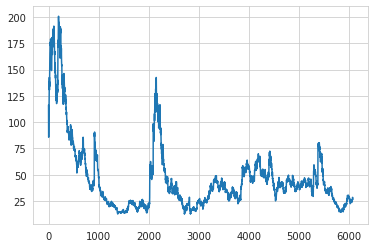

In [12]:
plt.plot(df)

In [13]:
df = df.reshape(-1,1)
df.shape

(6081, 1)

In [14]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])

In [15]:
dataset_train.shape

(4864, 1)

In [17]:
dataset_test.shape

(1267, 1)

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [19]:
#50 timestep
def create_dataset(df):
  x = []
  y = []
  for i in range(50,df.shape[0]):
    x.append(df[i-50:i,0])
    y.append(df[i,0])
  x = np.array(x)
  y = np.array(y)
  return x,y

In [20]:
x_train, y_train = create_dataset(dataset_train)

In [21]:
x_train

array([[0.55074317, 0.4883597 , 0.38793884, ..., 0.79819935, 0.78360237,
        0.75936285],
       [0.4883597 , 0.38793884, 0.4286932 , ..., 0.78360237, 0.75936285,
        0.76564914],
       [0.38793884, 0.4286932 , 0.38905759, ..., 0.75936285, 0.76564914,
        0.78322945],
       ...,
       [0.17111502, 0.17777423, 0.1737787 , ..., 0.14980555, 0.15113739,
        0.14847371],
       [0.17777423, 0.1737787 , 0.16978318, ..., 0.15113739, 0.14847371,
        0.14714187],
       [0.1737787 , 0.16978318, 0.16978318, ..., 0.14847371, 0.14714187,
        0.15380108]])

In [22]:
x_train.shape

(4814, 50)

In [23]:
y_train

array([0.76564914, 0.78322945, 0.77065686, ..., 0.14714187, 0.15380108,
       0.14714187])

In [24]:
x_test,y_test = create_dataset(dataset_test)

In [25]:
x_train[0]

array([0.55074317, 0.4883597 , 0.38793884, 0.4286932 , 0.38905759,
       0.46667732, 0.42128816, 0.48542965, 0.50679239, 0.5276224 ,
       0.50807096, 0.56864312, 0.59682489, 0.62287571, 0.60939747,
       0.63379681, 0.67689521, 0.69106601, 0.62697778, 0.66917053,
       0.64450482, 0.68802941, 0.73533642, 0.72079271, 0.74284801,
       0.76703425, 0.80810825, 0.7762506 , 0.81498056, 0.82020137,
       0.84982153, 0.85280486, 0.86516435, 0.85466944, 0.85173939,
       0.86979916, 0.86804113, 0.86084918, 0.86244739, 0.8612221 ,
       0.86670929, 0.88519525, 0.88141282, 0.87954824, 0.85578818,
       0.83740877, 0.80432582, 0.79819935, 0.78360237, 0.75936285])

In [26]:
x_train = np.reshape(x_train,(4814,50,1))

In [27]:
x_train.shape

(4814, 50, 1)

In [28]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [29]:
x_test.shape

(1217, 50, 1)

In [30]:
model = Sequential()
model.add(LSTM(units=96,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [31]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

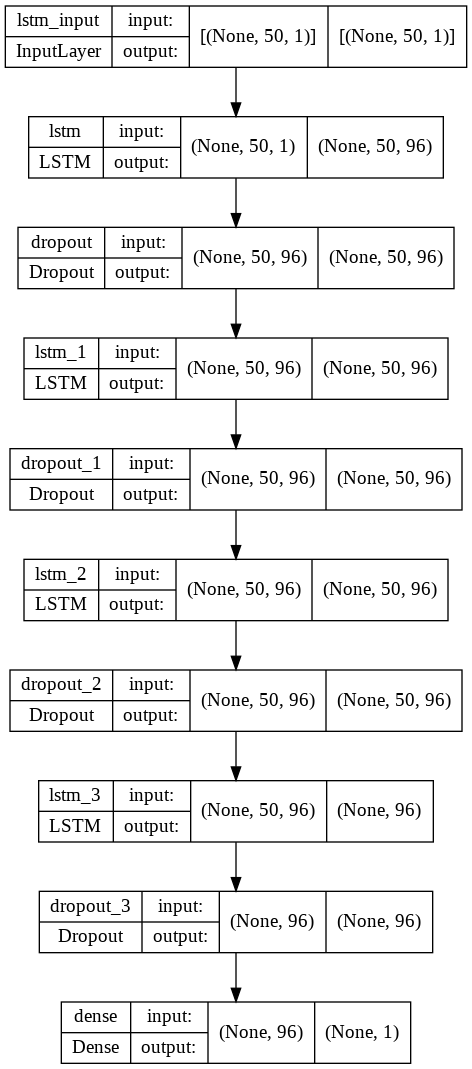

In [32]:
import tensorflow as tf
tf.keras.utils.plot_model(model,show_shapes=True)


In [33]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
151/151 [==============================] - 14s 14ms/step - loss: 0.0042
Epoch 2/10
151/151 [==============================] - 2s 13ms/step - loss: 0.0018
Epoch 3/10
151/151 [==============================] - 2s 14ms/step - loss: 0.0014
Epoch 4/10
151/151 [==============================] - 2s 13ms/step - loss: 0.0011
Epoch 5/10
151/151 [==============================] - 2s 14ms/step - loss: 0.0011
Epoch 6/10
151/151 [==============================] - 2s 13ms/step - loss: 0.0010
Epoch 7/10
151/151 [==============================] - 2s 13ms/step - loss: 9.1038e-04
Epoch 8/10
151/151 [==============================] - 2s 13ms/step - loss: 8.9254e-04
Epoch 9/10
151/151 [==============================] - 2s 13ms/step - loss: 7.3782e-04
Epoch 10/10
151/151 [==============================] - 2s 13ms/step - loss: 7.3399e-04


In [35]:
predictions = model.predict(x_test)

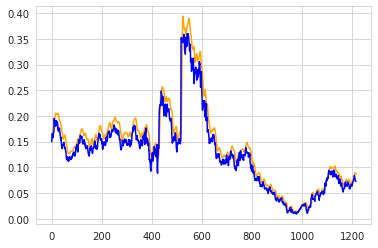

In [36]:
plt.figure()
plt.plot(predictions,color='orange')
plt.plot(y_test,color='blue')
plt.show()